In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM

In [86]:
tf.__version__

'2.4.1'

In [87]:
X = np.linspace(0,100,10000)
X.shape

(10000,)

In [88]:
y = np.sin(X)

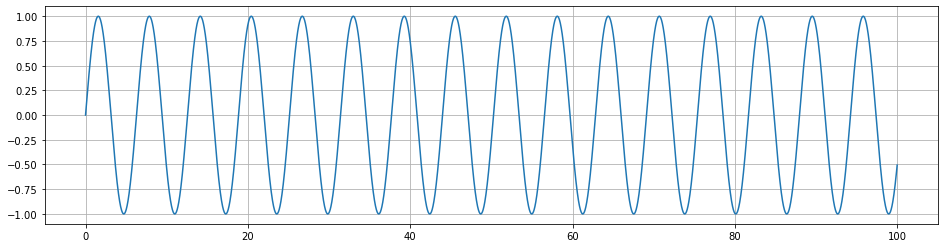

In [89]:
plt.figure(figsize=(16,4))
plt.plot(X,y)
plt.grid()

In [90]:
Length = X.shape[0]
TrainLength = Length * 70 // 100

X_train = X[:TrainLength]
y_train = y[:TrainLength]

X_test = X[TrainLength:]
y_test = y[TrainLength:]

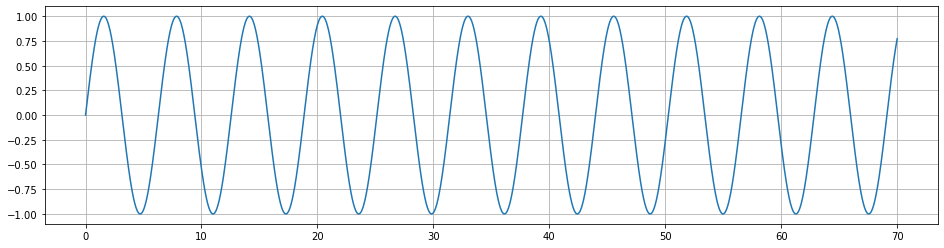

In [91]:
plt.figure(figsize=(16,4))
plt.plot(X_train,y_train)
plt.grid()

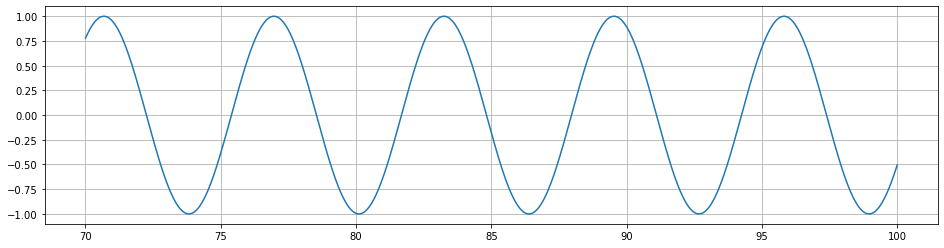

In [92]:
plt.figure(figsize=(16,4))
plt.plot(X_test,y_test)
plt.grid()

In [124]:
model = Sequential(name='fx')

activation = 'elu'
dropout = 0.4

# model.add(Dense(100))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.03))
# model.add(Dense(100))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.03))
# model.add(Dense(100))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.03))
# model.add(Dense(100))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.03))

model.add(Dense(100,activation=activation))
model.add(Dense(100,activation=activation))
model.add(Dense(100,activation=activation))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.9798 - val_loss: 0.5177
Epoch 2/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5219 - val_loss: 0.8291
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5406 - val_loss: 0.5469
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5089 - val_loss: 0.5302
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4970 - val_loss: 0.5175
Epoch 6/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5118 - val_loss: 0.5405
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5096 - val_loss: 0.6865
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5021 - val_loss: 0.5274
Epoch 9/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.5515
Epoch 10/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4789 - val_loss: 0.5163

<AxesSubplot:>

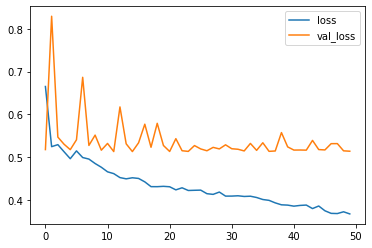

In [125]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

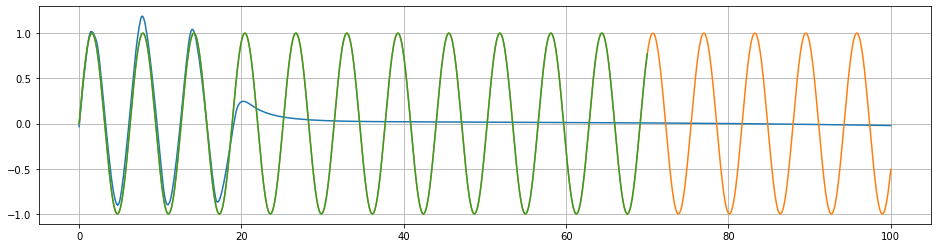

In [126]:
y_pred = model.predict(X)

plt.figure(figsize=(16,4))
plt.plot(X,y_pred)
plt.plot(X,y)
plt.plot(X_train,y_train)
plt.grid()